In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 18)

In [5]:
df.sample(3)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2517,flat,tarc maceo,sector 91,1.5,6466.0,3.0,4.0,3+,3.0,Relatively New,1786.0,1.0,1.0,0.0,0.0,0.0,0.0,112.0
1085,flat,sobha smriti apartments,sector 56,0.5,8333.0,1.0,1.0,2,3.0,Old Property,667.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1437,house,independent,sector 2,3.0,19268.0,6.0,4.0,3+,3.0,Old Property,1557.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0


* Creating train_df by dropping society(not included in input) and price_per_sqft(prediction)

In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.shape

(3554, 16)

Converting luxury_score in category to take it as a input

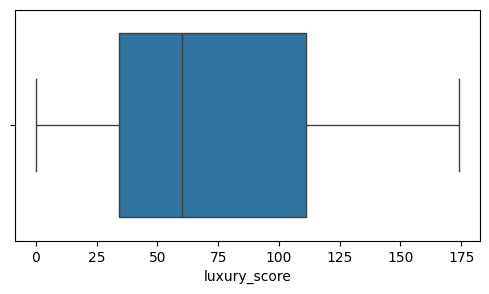

In [8]:
plt.figure(figsize=(6,3))
sns.boxplot(x='luxury_score', data=df)
plt.show()

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)
train_df.sample(3)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
1416,flat,sector 84,0.90,3.0,3.0,3,11.0,Relatively New,1652.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,Medium
1457,flat,sector 92,1.22,4.0,3.0,3,9.0,Under Construction,2093.0,0.0,1.0,0.0,0.0,0.0,0.0,99.0,Medium
47,flat,sector 69,1.38,3.0,3.0,1,12.0,Relatively New,1709.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,High


Converting floor num in category to take it as a input

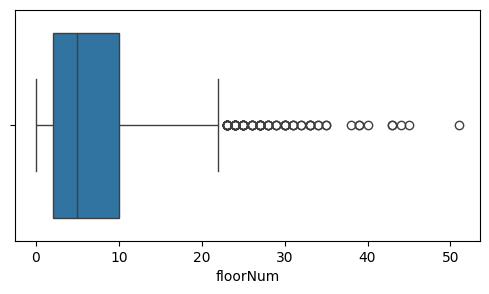

In [11]:
plt.figure(figsize=(6,3))
sns.boxplot(x='floorNum', data=df)
plt.show()

In [12]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [13]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.sample(3)

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
1898,flat,sector 7,0.80,3.0,2.0,1,4.0,Relatively New,1100.0,0.0,0.0,0.0,0.0,0.0,1.0,69.0,Medium,Mid Floor
2784,flat,sector 79,1.93,3.0,4.0,3+,5.0,Relatively New,2047.0,0.0,1.0,0.0,0.0,0.0,0.0,158.0,High,Mid Floor
1506,flat,sector 77,1.10,3.0,4.0,3+,9.0,Relatively New,1829.0,0.0,1.0,0.0,0.0,0.0,0.0,49.0,Low,Mid Floor


In [15]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [16]:
train_df.shape

(3554, 16)

Applying  ordinary encoder to convert category to numericals

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'sector 1',
       'sector 10', 'sector 102', 'sector 103', 'sector 104',
       'sector 105', 'sector 106', 'sector 107', 'sector 108',
       'sector 109', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 30', 'sector 31', 'sector 33',
       'sector 36', 'sector 37', 'sector 37d', 'sector 38', 'sector 39',
       'sector 4', 'sector 40', 'sector 41', 'sector 43', 'sector 45',
       'sector 46', 'sector 47', 'sector 48', 'sector 49', 'sector 5',
       'sector 50', 'sector 51', 'sector 52', 'sector 53', 'sector 54',
       'sector 55', 'sector 56', 'sector 57', 'sector 58', 'sector 59',
       'sector 6', 'sector 60', 'sector 61', 'sector 62', 

In [18]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,36.0,3.0,2.0,2.0,1.0,850.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,95.0,2.0,2.0,2.0,1.0,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
2,0.0,103.0,2.0,2.0,1.0,1.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,99.0,3.0,4.0,4.0,3.0,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0
4,0.0,5.0,2.0,2.0,1.0,3.0,582.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


## Feature Selection Techniques

### 1 - Correlation Analysis

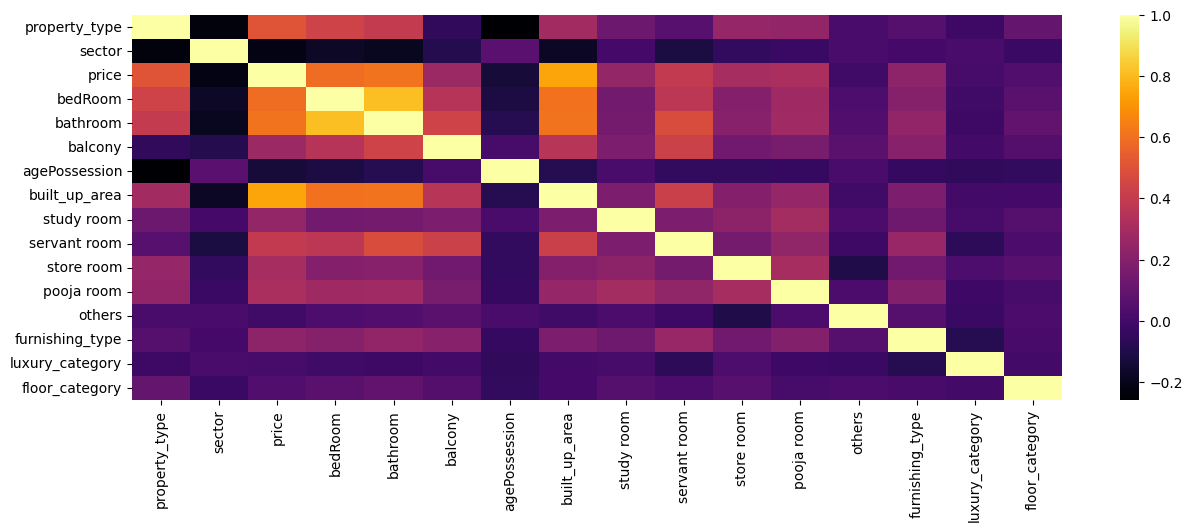

In [19]:
plt.figure(figsize=(15,5))
sns.heatmap(data_label_encoded.corr(),cmap='inferno')
plt.show()

In [20]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.212084
1,price,1.000000
2,bedRoom,0.591289
3,bathroom,0.609777
4,balcony,0.269637
5,agePossession,-0.134171
6,built_up_area,0.748574
7,study room,0.242955
8,servant room,0.391930
9,store room,0.305677


### 2 - Random Forest Feature Importance

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.650541
1,sector,0.102670
0,property_type,0.100079
3,bathroom,0.025882
2,bedRoom,0.024041
8,servant room,0.019320
5,agePossession,0.014519
4,balcony,0.012576
12,furnishing_type,0.010604
7,study room,0.008383


### 3 - Gradient Boosting Feature importances

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.677567
1,sector,0.102676
0,property_type,0.098439
2,bedRoom,0.037715
3,bathroom,0.036288
8,servant room,0.023393
9,store room,0.010356
5,agePossession,0.004179
7,study room,0.003221
12,furnishing_type,0.002804


### 4 - Permutation Importance

In [23]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.736026
0,property_type,0.200636
1,sector,0.178881
8,servant room,0.021018
3,bathroom,0.019884
2,bedRoom,0.018006
5,agePossession,0.004970
9,store room,0.002150
14,floor_category,0.000907
11,others,0.000792


### 5 - LASSO

In [24]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.510173
0,property_type,0.713829
3,bathroom,0.275042
9,store room,0.199655
7,study room,0.171846
12,furnishing_type,0.164113
8,servant room,0.160601
10,pooja room,0.073845
13,luxury_category,0.055268
2,bedRoom,0.014170


### 6 - RFE

In [25]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.646943
1,sector,0.104486
0,property_type,0.096925
2,bedRoom,0.030236
3,bathroom,0.024835
8,servant room,0.018640
5,agePossession,0.016083
4,balcony,0.011545
12,furnishing_type,0.010548
9,store room,0.009839


### 7 - Linear Regression Weights

In [26]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.512629
0,property_type,0.712890
3,bathroom,0.281976
9,store room,0.204159
7,study room,0.180048
12,furnishing_type,0.173192
8,servant room,0.169605
10,pooja room,0.076893
13,luxury_category,0.066472
2,bedRoom,0.016790


In [29]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').set_index('feature')

In [30]:
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs
feature,,,,,,,
sector,-0.212084,0.102670,0.102676,0.178881,-0.069634,0.104486,-0.078657
bedRoom,0.591289,0.024041,0.037715,0.018006,0.014170,0.030236,0.016790
bathroom,0.609777,0.025882,0.036288,0.019884,0.275042,0.024835,0.281976
balcony,0.269637,0.012576,0.002077,-0.000432,-0.043562,0.011545,-0.066353
agePossession,-0.134171,0.014519,0.004179,0.004970,-0.000000,0.016083,-0.002041
built_up_area,0.748574,0.650541,0.677567,0.736026,1.510173,0.646943,1.512629
study room,0.242955,0.008383,0.003221,-0.018027,0.171846,0.006766,0.180048
servant room,0.391930,0.019320,0.023393,0.021018,0.160601,0.018640,0.169605
store room,0.305677,0.008329,0.010356,0.002150,0.199655,0.009839,0.204159


In [37]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')
print(scores.mean())

0.8193190510339333


In [38]:
# after feature engineering (if we remove extra rooms)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')
print(scores.mean())

0.8196500940616491


In [39]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [40]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [41]:
export_df.sample(4)

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
1851,1.0,58.0,3.0,3.0,2.0,2.0,2160.0,1.0,0.0,0.0,1.0,1.0,4.70
1699,0.0,102.0,2.0,2.0,3.0,3.0,1430.0,0.0,0.0,0.0,0.0,2.0,1.02
3282,0.0,99.0,2.0,2.0,3.0,4.0,846.0,0.0,0.0,0.0,1.0,1.0,0.78
947,0.0,75.0,3.0,3.0,3.0,3.0,1788.0,1.0,0.0,0.0,1.0,2.0,1.51


In [42]:
export_df.shape

(3554, 13)